# Solutions 2 - Examples in Eigenvalue Decomposition
---

## Assignment 1


In [11]:
# Pkg.add("MatrixMarket")
using MatrixMarket

In [12]:
whos(MatrixMarket)

                  MatrixMarket     23 KB     Module
                        mmread   7176 bytes  Function


In [13]:
#############################################################
# Download and parse every file from the NIST Matrix Market #
#############################################################

#Convenience function to emulate the behavior of gunzip
using GZip
function gunzip(fname)
    destname, ext = splitext(fname)
    if ext != ".gz"
        error("gunzip: $fname: unknown suffix -- ignored")
    end
    open(destname, "w") do f
        GZip.open(fname) do g
            write(f, readall(g))
        end
    end
    destname
end

#Download and parse master list of matrices
if !isfile("matrices.html")
    download("http://math.nist.gov/MatrixMarket/matrices.html", "matrices.html")
end

matrixmarketdata = Any[]
open("matrices.html") do f
   for line in readlines(f)
       if contains(line, """<A HREF="/MatrixMarket/data/""")
           collectionname, setname, matrixname = split(split(line, '"')[2], '/')[4:6]
           matrixname = split(matrixname, '.')[1]
           push!(matrixmarketdata, (collectionname, setname, matrixname) )
       end
   end
end

#Download one matrix at random
n = rand(1:length(matrixmarketdata))
for (collectionname, setname, matrixname) in matrixmarketdata[n:n]
    fn = string(collectionname, '_', setname, '_', matrixname)
    mtxfname = string(fn, ".mtx")
    if !isfile(mtxfname)
        url = "ftp://math.nist.gov/pub/MatrixMarket2/$collectionname/$setname/$matrixname.mtx.gz"
        gzfname = string(fn, ".mtx.gz")
        try
            download(url, gzfname)
        catch
            continue
        end
        gunzip(gzfname)
    end
end

In [14]:
readdir()

27-element Array{ByteString,1}:
 ".ipynb_checkpoints"                                                                     
 "Harwell-Boeing_bcsstruc1_bcsstk11.mtx"                                                  
 "Harwell-Boeing_smtape_bp___600.mtx"                                                     
 "Harwell-Boeing_smtape_bp___600.mtx.gz"                                                  
 "L3a Eigenvalue Decomposition - Definitions and Facts.ipynb"                             
 "L3b Eigenvalue Decomposition - Perturbation Theory.ipynb"                               
 "L4a Symmetric Eigenvalue Decomposition - Algorithms and Error Analysis.ipynb"           
 "L4b Symmetric Eigenvalue Decomposition - Algorithms for Tridiagonal Matrices.ipynb"     
 "L4c Symmetric Eigenvalue Decomposition - Jacobi Method and High Relative Accuracy.ipynb"
 "L4d Symmetric Eigenvalue Decomposition - Lanczos Method.ipynb"                          
 "L5a Singular Value Decomposition - Definitions and Facts

In [15]:
A=mmread("Harwell-Boeing_bcsstruc1_bcsstk11.mtx")

 in depwarn at deprecated.jl:73
 in parseint at deprecated.jl:50
 in map at abstractarray.jl:1305
 in mmread at C:\Users\Ivan\.julia\v0.4\MatrixMarket\src\MatrixMarket.jl:50
 in mmread at C:\Users\Ivan\.julia\v0.4\MatrixMarket\src\MatrixMarket.jl:18
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at C:\Users\Ivan\.julia\v0.4\IJulia\src\execute_request.jl:183
 in eventloop at C:\Users\Ivan\.julia\v0.4\IJulia\src\IJulia.jl:143
 in anonymous at task.jl:447
while loading In[15], in expression starting on line 1
 in depwarn at deprecated.jl:73
 in parsefloat at deprecated.jl:50
 in mmread at C:\Users\Ivan\.julia\v0.4\MatrixMarket\src\MatrixMarket.jl:67
 in mmread at C:\Users\Ivan\.julia\v0.4\MatrixMarket\src\MatrixMarket.jl:18
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at C:\Users\Ivan\.julia\v0.4\IJulia\src\execute_request.jl:183
 in eventloop at C:\Users\Ivan\.julia\v0.4\IJulia\src\IJulia.jl:143
 in anonymous at task.jl:447
while loading In[15]

1473x1473 sparse matrix with 34241 Float64 entries:
	[1   ,    1]  =  1.01185e6
	[2   ,    1]  =  4.11009e6
	[3   ,    1]  =  -4.47035e-8
	[4   ,    1]  =  -3.11976e5
	[5   ,    1]  =  -1.18472e6
	[6   ,    1]  =  9.31323e-9
	[52  ,    1]  =  22135.0
	[53  ,    1]  =  90321.0
	[54  ,    1]  =  -18909.1
	[55  ,    1]  =  -1.4405e5
	⋮
	[1415, 1473]  =  -1.36083e6
	[1416, 1473]  =  -2.28427e6
	[1420, 1473]  =  18909.1
	[1421, 1473]  =  4631.25
	[1422, 1473]  =  -5.29354e6
	[1465, 1473]  =  -1.02445e-8
	[1466, 1473]  =  3.35276e-8
	[1467, 1473]  =  7.58227e5
	[1471, 1473]  =  6.33299e-8
	[1472, 1473]  =  -2.6077e-7
	[1473, 1473]  =  1.82401e7

In [16]:
size(A)

(1473,1473)

In [17]:
issym(A)

true

In [18]:
cond(full(A))

2.2118529808121562e8

In [19]:
using Gadfly

In [20]:
?spy

search: spy speye Display display displayable undisplay redisplay popdisplay



```
spy(M::AbstractMatrix, elements::ElementOrFunction...; mapping...)
```

Simple heatmap plots of matrices.

It is a wrapper around the `plot()` function using the `rectbin` geometry. It also applies a sane set of defaults to make sure that the plots look nice by default. Specifically - the aspect ratio of the coordinate system is fixed Coord.cartesian(fixed=true), so that the rectangles become squares - the axes run from 0.5 to N+0.5, because the first row/column is drawn to (0.5, 1.5) and the last one to (N-0.5, N+0.5). - the y-direction is flipped, so that the [1,1] of a matrix is in the top left corner, as is customary - NaNs are not drawn. `spy` leaves "holes" instead into the heatmap.

### Args:

  * M: A matrix.

### Returns:

A plot object.

#### Known bugs:

  * If the matrix is only NaNs, then it throws an `ArgumentError`, because      an empty collection gets passed to the `plot` function / `rectbin` geometry.


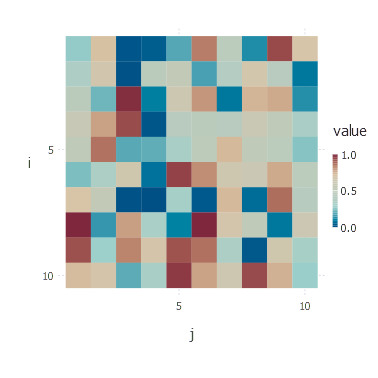

In [23]:
# Plot of a small random matrix, for illustration
B=rand(10,10)
myplot=spy(B)
draw(PNG(10cm,10cm),myplot)

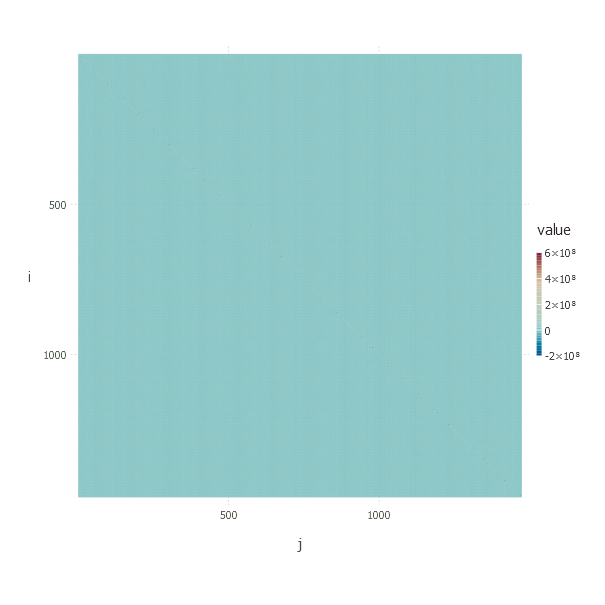

In [24]:
# Now our matrix - Wait!
myPlot=spy(A)
draw(PNG(16cm,16cm),myPlot)

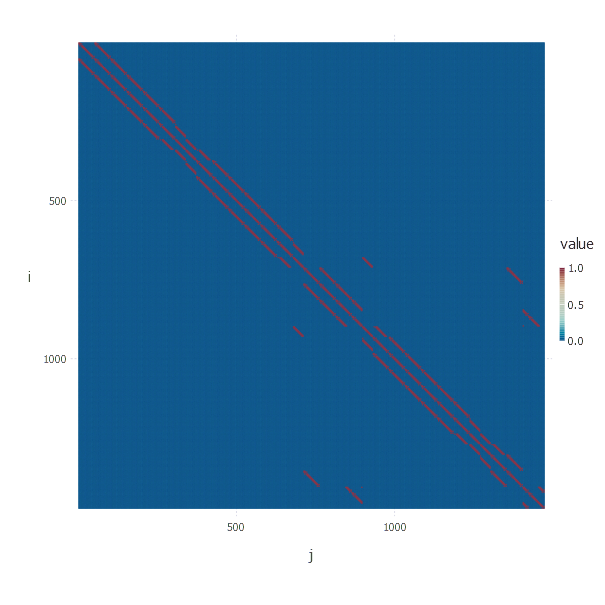

In [25]:
# To see the structure:
myPlot=spy(map(Int64,A.!=0.0))
draw(PNG(16cm,16cm),myPlot)

## Assignment 2

In [14]:
using MatrixDepot

In [15]:
whos(MatrixDepot)

                     @addgroup    282 bytes  Function
                      @rmgroup    281 bytes  Function
                   MatrixDepot    577 KB     Module
                   matrixdepot     16 KB     Function


In [16]:
matrixdepot()


Matrices:
   1) baart            2) binomial         3) blur             4) cauchy        
   5) chebspec         6) chow             7) circul           8) clement       
   9) companion       10) deriv2          11) dingdong        12) fiedler       
  13) forsythe        14) foxgood         15) frank           16) golub         
  17) gravity         18) grcar           19) hadamard        20) hankel        
  21) heat            22) hilb            23) invhilb         24) invol         
  25) kahan           26) kms             27) lehmer          28) lotkin        
  29) magic           30) minij           31) moler           32) neumann       
  33) oscillate       34) parallax        35) parter          36) pascal        
  37) pei             38) phillips        39) poisson         40) prolate       
  41) randcorr        42) rando           43) randsvd         44) rohess        
  45) rosser          46) sampling        47) shaw            48) spikes        
  49) toeplitz   

In [18]:
matrixdepot("eigen")

23-element Array{ASCIIString,1}:
 "chebspec" 
 "chow"     
 "circul"   
 "clement"  
 "dingdong" 
 "fiedler"  
 "forsythe" 
 "frank"    
 "grcar"    
 "hadamard" 
 "invol"    
 "lotkin"   
 "minij"    
 "neumann"  
 "oscillate"
 "parter"   
 "pascal"   
 "poisson"  
 "rosser"   
 "sampling" 
 "tridiag"  
 "wathen"   
 "wilkinson"

In [17]:
matrixdepot("sparse","symmetric")

2-element Array{ASCIIString,1}:
 "poisson"
 "wathen" 

In [25]:
A=matrixdepot("fiedler",100)

100x100 Array{Float64,2}:
  0.0   1.0   2.0   3.0   4.0   5.0  …  94.0  95.0  96.0  97.0  98.0  99.0
  1.0   0.0   1.0   2.0   3.0   4.0     93.0  94.0  95.0  96.0  97.0  98.0
  2.0   1.0   0.0   1.0   2.0   3.0     92.0  93.0  94.0  95.0  96.0  97.0
  3.0   2.0   1.0   0.0   1.0   2.0     91.0  92.0  93.0  94.0  95.0  96.0
  4.0   3.0   2.0   1.0   0.0   1.0     90.0  91.0  92.0  93.0  94.0  95.0
  5.0   4.0   3.0   2.0   1.0   0.0  …  89.0  90.0  91.0  92.0  93.0  94.0
  6.0   5.0   4.0   3.0   2.0   1.0     88.0  89.0  90.0  91.0  92.0  93.0
  7.0   6.0   5.0   4.0   3.0   2.0     87.0  88.0  89.0  90.0  91.0  92.0
  8.0   7.0   6.0   5.0   4.0   3.0     86.0  87.0  88.0  89.0  90.0  91.0
  9.0   8.0   7.0   6.0   5.0   4.0     85.0  86.0  87.0  88.0  89.0  90.0
 10.0   9.0   8.0   7.0   6.0   5.0  …  84.0  85.0  86.0  87.0  88.0  89.0
 11.0  10.0   9.0   8.0   7.0   6.0     83.0  84.0  85.0  86.0  87.0  88.0
 12.0  11.0  10.0   9.0   8.0   7.0     82.0  83.0  84.0  85.0  86.0  87.0

In [28]:
cond(A)

6945.654788928217

In [29]:
include("ModuleB.jl")

ModuleB

In [31]:
myPowerMethod(A,1e-10)

100-element Array{Float64,1}:
  3473.68    
 -2026.59    
  -638.615   
  -225.325   
  -133.599   
   -81.2238  
   -57.7518  
   -41.5227  
   -32.2345  
   -25.1849  
   -20.5961  
   -16.915   
   -14.319   
     ⋮       
    -0.518198
    -0.51523 
    -0.512545
    -0.510128
    -0.507981
    -0.506094
    -0.504469
    -0.503097
    -0.50198 
    -0.501112
    -0.500494
    -0.500123

In [30]:
using ModuleB

In [26]:
eigvals(A)

100-element Array{Float64,1}:
 -2026.59    
  -638.615   
  -225.325   
  -133.599   
   -81.2238  
   -57.7518  
   -41.5227  
   -32.2345  
   -25.1849  
   -20.5961  
   -16.915   
   -14.319   
   -12.1587  
     ⋮       
    -0.51523 
    -0.512545
    -0.510128
    -0.507981
    -0.506094
    -0.504469
    -0.503097
    -0.50198 
    -0.501112
    -0.500494
    -0.500123
  3473.68    

In [21]:
matrixdepot("ill-cond","symmetric")

10-element Array{ASCIIString,1}:
 "cauchy"   
 "hilb"     
 "invhilb"  
 "kms"      
 "moler"    
 "oscillate"
 "pascal"   
 "pei"      
 "prolate"  
 "tridiag"  

## Assignment 3

Some programs:

* https://github.com/purzelrakete/Pagerank.jl

* https://gist.github.com/domluna/2b9358ccc89fee7d5e26

You can also try function `eigs()` or the Power method.


In [27]:
i = vec([ 2 6 3 4 4 5 6 1 1])
j = vec([ 1 1 2 2 3 3 3 4 6])

9-element Array{Int64,1}:
 1
 1
 2
 2
 3
 3
 3
 4
 6

In [28]:
G=sparse(i,j,1.0)

6x6 sparse matrix with 9 Float64 entries:
	[2, 1]  =  1.0
	[6, 1]  =  1.0
	[3, 2]  =  1.0
	[4, 2]  =  1.0
	[4, 3]  =  1.0
	[5, 3]  =  1.0
	[6, 3]  =  1.0
	[1, 4]  =  1.0
	[1, 6]  =  1.0

In [29]:
typeof(G)

SparseMatrixCSC{Float64,Int64}

In [32]:
full(G)

6x6 Array{Float64,2}:
 0.0  0.0  0.0  1.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0
 1.0  0.0  1.0  0.0  0.0  0.0

In [33]:
c=sum(G,1)

1x6 Array{Float64,2}:
 2.0  2.0  3.0  1.0  0.0  1.0

In [34]:
n=size(G,1)
for j=1:n
    if c[j]>0
        G[:,j]=G[:,j]/c[j]
    end
end

In [8]:
G

6x6 sparse matrix with 9 Float64 entries:
	[2, 1]  =  0.5
	[6, 1]  =  0.5
	[3, 2]  =  0.5
	[4, 2]  =  0.5
	[4, 3]  =  0.333333
	[5, 3]  =  0.333333
	[6, 3]  =  0.333333
	[1, 4]  =  1.0
	[1, 6]  =  1.0

In [35]:
full(G)

6x6 Array{Float64,2}:
 0.0  0.0  0.0       1.0  0.0  1.0
 0.5  0.0  0.0       0.0  0.0  0.0
 0.0  0.5  0.0       0.0  0.0  0.0
 0.0  0.5  0.333333  0.0  0.0  0.0
 0.0  0.0  0.333333  0.0  0.0  0.0
 0.5  0.0  0.333333  0.0  0.0  0.0

In [36]:
p=0.85
δ=(1-p)/n

0.025000000000000005

In [38]:
z = ((1-p)*(c.!=0) + (c.==0))/n

1x6 Array{Float64,2}:
 0.025  0.025  0.025  0.025  0.166667  0.025

In [39]:
# Starting vector
x=ones(n)/n

6-element Array{Float64,1}:
 0.166667
 0.166667
 0.166667
 0.166667
 0.166667
 0.166667

In [40]:
# Check A
A=p*G+ones(n)*z

6x6 Array{Float64,2}:
 0.025  0.025  0.025     0.875  0.166667  0.875
 0.45   0.025  0.025     0.025  0.166667  0.025
 0.025  0.45   0.025     0.025  0.166667  0.025
 0.025  0.45   0.308333  0.025  0.166667  0.025
 0.025  0.025  0.308333  0.025  0.166667  0.025
 0.45   0.025  0.308333  0.025  0.166667  0.025

In [41]:
sum(A,1)

1x6 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0

In [42]:
z=vec(z)

6-element Array{Float64,1}:
 0.025   
 0.025   
 0.025   
 0.025   
 0.166667
 0.025   

In [47]:
for j=1:5
    x=p*G*x+ones(n)*(z⋅x)
end

In [48]:
x/norm(x,1)

6-element Array{Float64,1}:
 0.321024 
 0.170538 
 0.106596 
 0.136795 
 0.0643103
 0.200737 

In [49]:
fieldnames(G)

5-element Array{Symbol,1}:
 :m     
 :n     
 :colptr
 :rowval
 :nzval 

In [50]:
G

6x6 sparse matrix with 9 Float64 entries:
	[2, 1]  =  0.5
	[6, 1]  =  0.5
	[3, 2]  =  0.5
	[4, 2]  =  0.5
	[4, 3]  =  0.333333
	[5, 3]  =  0.333333
	[6, 3]  =  0.333333
	[1, 4]  =  1.0
	[1, 6]  =  1.0

In [52]:
G.colptr

7-element Array{Int64,1}:
  1
  3
  5
  8
  9
  9
 10

In [53]:
G.nzval

9-element Array{Float64,1}:
 0.5     
 0.5     
 0.5     
 0.5     
 0.333333
 0.333333
 0.333333
 1.0     
 1.0     

Let us put this into function

In [54]:
function myPageRank(G::SparseMatrixCSC{Float64,Int64},steps::Int)
    p=0.85
    c=sum(G,1)/p
    n=size(G,1)
    for i=1:n
        G.nzval[G.colptr[i]:G.colptr[i+1]-1]./=c[i]
    end
    e=ones(n)
    x=e/n
    z = vec(((1-p)*(c.!=0) + (c.==0))/n)
    for j=1:steps
        x=G*x+(z⋅x)
    end
    x/norm(x,1)
end

myPageRank (generic function with 1 method)

In [55]:
myPageRank(G,15)

6-element Array{Float64,1}:
 0.321024 
 0.170538 
 0.106596 
 0.136795 
 0.0643103
 0.200737 

In [60]:
# Now the bigger example
W=readdlm("web-Stanford.txt",Int)

2312497x2 Array{Int64,2}:
      1    6548
      1   15409
   6548   57031
  15409   13102
      2   17794
      2   25202
      2   53625
      2   54582
      2   64930
      2   73764
      2   84477
      2   98628
      2  100193
      ⋮        
 281849  165189
 281849  177014
 281849  226290
 281849  243180
 281849  244195
 281849  247252
 281849  281568
 281865  186750
 281865  225872
 281888  114388
 281888  192969
 281888  233184

In [61]:
?sparse

search: sparse sparsevec SparseMatrix SparseMatrixCSC issparse



```
sparse(A)
```

Convert an AbstractMatrix `A` into a sparse matrix.

```
sparse(I,J,V,[m,n,combine])
```

Create a sparse matrix `S` of dimensions `m x n` such that `S[I[k], J[k]] = V[k]`. The `combine` function is used to combine duplicates. If `m` and `n` are not specified, they are set to `maximum(I)` and `maximum(J)` respectively. If the `combine` function is not supplied, duplicates are added by default. All elements of `I` must satisfy `1 <= I[k] <= m`, and all elements of `J` must satisfy `1 <= J[k] <= n`.


In [64]:
S=sparse(W[:,2],W[:,1],1.0)

281903x281903 sparse matrix with 2312497 Float64 entries:
	[6548  ,      1]  =  1.0
	[15409 ,      1]  =  1.0
	[17794 ,      2]  =  1.0
	[25202 ,      2]  =  1.0
	[53625 ,      2]  =  1.0
	[54582 ,      2]  =  1.0
	[64930 ,      2]  =  1.0
	[73764 ,      2]  =  1.0
	[84477 ,      2]  =  1.0
	[98628 ,      2]  =  1.0
	⋮
	[168703, 281902]  =  1.0
	[180771, 281902]  =  1.0
	[266504, 281902]  =  1.0
	[275189, 281902]  =  1.0
	[44103 , 281903]  =  1.0
	[56088 , 281903]  =  1.0
	[90591 , 281903]  =  1.0
	[94440 , 281903]  =  1.0
	[216688, 281903]  =  1.0
	[256539, 281903]  =  1.0
	[260899, 281903]  =  1.0

In [67]:
@time x100=myPageRank(S,100);

  1.767546 seconds (564.74 k allocations: 521.095 MB, 4.97% gc time)


In [68]:
maxabs((x80-x100)./x80)

1.4079070121516106e-5

In [69]:
sort(x100,rev=true)

281903-element Array{Float64,1}:
 0.0113029 
 0.00926783
 0.00829727
 0.00302312
 0.00300128
 0.00257173
 0.00245371
 0.00243079
 0.00239105
 0.00236401
 0.002301  
 0.00226742
 0.00223245
 ⋮         
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7

In [1]:
function meshgrid{T}(vx::AbstractVector{T}, vy::AbstractVector{T})
    m, n = length(vy), length(vx)
    vx = reshape(vx, 1, n)
    vy = reshape(vy, m, 1)
    (repmat(vx, m, 1), repmat(vy, 1, n))
end

meshgrid (generic function with 1 method)

In [3]:
meshgrid([1,2,3,4,5],[3,4,5,6])

(
4x5 Array{Int64,2}:
 1  2  3  4  5
 1  2  3  4  5
 1  2  3  4  5
 1  2  3  4  5,

4x5 Array{Int64,2}:
 3  3  3  3  3
 4  4  4  4  4
 5  5  5  5  5
 6  6  6  6  6)

In [6]:
X=[1,2,3,4,5]
Y=[3,4,5,6]
gridX= map(Float64,[x for x in X, y in Y])
gridY= map(Float64,[y for x in X, y in Y])

5x4 Array{Float64,2}:
 3.0  4.0  5.0  6.0
 3.0  4.0  5.0  6.0
 3.0  4.0  5.0  6.0
 3.0  4.0  5.0  6.0
 3.0  4.0  5.0  6.0

In [8]:
gridX

5x4 Array{Float64,2}:
 1.0  1.0  1.0  1.0
 2.0  2.0  2.0  2.0
 3.0  3.0  3.0  3.0
 4.0  4.0  4.0  4.0
 5.0  5.0  5.0  5.0